In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv("../data/forecasts_for_ml/X.csv").values
y = pd.read_csv("../data/forecasts_for_ml/y.csv").model_w_least_error

In [3]:
print(len(y))
y.value_counts() / len(y)

252167


prophet             0.246864
xgb_preds           0.223931
ardl                0.191797
autoreg             0.140831
exp_smooth          0.105482
exp_smooth_multi    0.091094
Name: model_w_least_error, dtype: float64

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [6]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)


In [ ]:
sum(yhat == y_test) / len(yhat)
# lol

0.21093152500892265

In [ ]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)


array([[ 6923,  4909,  3376,  2959,  8131,  7536],
       [ 4648,  4433,  2805,  2363,  5629,  5063],
       [ 3347,  2712,  2512,  1988,  4334,  3730],
       [ 2891,  2297,  1938,  1809,  3802,  3354],
       [ 8133,  5596,  4589,  3909, 11568,  9740],
       [ 7557,  5159,  4020,  3488,  9281,  9988]])

In [ ]:
from xgboost import XGBClassifier


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
yhat = model.predict(X_test)

In [ ]:
sum(yhat == y_test) / len(yhat)

0.27356005370587533

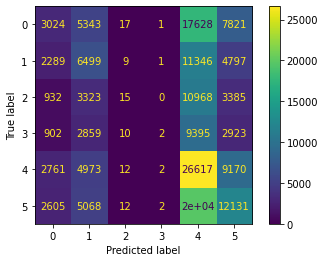

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat, )
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot()

In [ ]:
cm

array([[ 3024,  5343,    17,     1, 17628,  7821],
       [ 2289,  6499,     9,     1, 11346,  4797],
       [  932,  3323,    15,     0, 10968,  3385],
       [  902,  2859,    10,     2,  9395,  2923],
       [ 2761,  4973,    12,     2, 26617,  9170],
       [ 2605,  5068,    12,     2, 19675, 12131]])

In [ ]:
for target in y_test.unique():
    t = sum(np.logical_and(y_test == target, yhat == target))
    print(target, t)
    


autoreg 6499
xgb_preds 12131
exp_smooth_multi 2
ardl 3024
prophet 26617
exp_smooth 15


In [ ]:
sum(y_test == "autoreg") 
sum(yhat == "autoreg")

0.8886869766613219

In [ ]:
y_test.unique()

array(['autoreg', 'xgb_preds', 'exp_smooth_multi', 'ardl', 'prophet',
       'exp_smooth'], dtype=object)

In [ ]:
params = {
        'min_child_weight': [1, 5, 10, 50],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10]
        }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', 
                   return_train_score=True, verbose=10, cv=3)

In [ ]:
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV 1/3; 1/405] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 1/3; 1/405] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=(train=0.295, test=0.272) total time=  24.4s
[CV 2/3; 1/405] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 2/3; 1/405] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=(train=0.299, test=0.271) total time=  24.2s
[CV 3/3; 1/405] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6


KeyboardInterrupt: 